In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
df_sys_log = pd.read_csv('sysinfo.log',sep="[^\\w\\s]")
df_sys_log.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14 entries, ('host01', 10, 20, 30, 40, 98) to ('host12', 10, 20, 30, 50, 98)
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   node          14 non-null     int64
 1   IPAddress     14 non-null     int64
 2   cpu           14 non-null     int64
 3   memory        14 non-null     int64
 4   io            14 non-null     int64
 5   tls           14 non-null     int64
 6   web           14 non-null     int64
 7   semaphore     14 non-null     int64
 8   sharedmemory  14 non-null     int64
dtypes: int64(9)
memory usage: 2.5+ KB


C:\Users\theeba\AppData\Local\Temp\ipykernel_23452\18231646.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_sys_log = pd.read_csv('sysinfo.log',sep="[^\\w\\s]")


In [5]:
df_sys_log.shape

(14, 9)

In [7]:
df_sys_log.columns

Index(['node', 'IPAddress', 'cpu', 'memory', 'io', 'tls', 'web', 'semaphore',
       'sharedmemory'],
      dtype='object')

In [9]:
df_sys_log.drop(columns=['IPAddress','web','tls'])

node  cpu  memory   io  semaphore  sharedmemory
host01 10 20 30 40 98    45   32      90  120         90            44
host02 10 20 30 41 65    35   32      90  120         90            44
host03 10 20 30 42 98    23   32      90  120         90            43
host04 10 20 30 43 68    45   32      90  120         90            42
host05 10 20 30 44 78    55   32      90  120         90            44
host06 10 20 30 45 98    25   32      90  120         90            41
host07 10 20 30 45 98    45   32      90  120         80            44
host08 10 20 30 46 98    25   32      90  120         90            45
host09 10 20 30 47 88    45   32      90  120         80            44
                   98    75   32      90  120         80            43
host10 10 20 30 48 98    45   32      90  120         90            44
                   98    45   32      90  120         90            42
host11 10 20 30 49 98    45   32      90  120         50            44
host12 10 20 30 50 98    45   32      90  120         50            44

In [11]:
df_sys_log.drop(columns=['IPAddress','web','tls'],inplace=True)

In [13]:
df_sys_log.rename(columns={'semaphore':'SEM','sharedmemory':'SHM'})

node  cpu  memory   io  SEM  SHM
host01 10 20 30 40 98    45   32      90  120   90   44
host02 10 20 30 41 65    35   32      90  120   90   44
host03 10 20 30 42 98    23   32      90  120   90   43
host04 10 20 30 43 68    45   32      90  120   90   42
host05 10 20 30 44 78    55   32      90  120   90   44
host06 10 20 30 45 98    25   32      90  120   90   41
host07 10 20 30 45 98    45   32      90  120   80   44
host08 10 20 30 46 98    25   32      90  120   90   45
host09 10 20 30 47 88    45   32      90  120   80   44
                   98    75   32      90  120   80   43
host10 10 20 30 48 98    45   32      90  120   90   44
                   98    45   32      90  120   90   42
host11 10 20 30 49 98    45   32      90  120   50   44
host12 10 20 30 50 98    45   32      90  120   50   44

In [15]:
df_sys_log.rename(columns={'semaphore':'SEM','sharedmemory':'SHM'},inplace=True)

In [17]:
df_sys_log.dropna() # drop rows with missing value

node  cpu  memory   io  SEM  SHM
host01 10 20 30 40 98    45   32      90  120   90   44
host02 10 20 30 41 65    35   32      90  120   90   44
host03 10 20 30 42 98    23   32      90  120   90   43
host04 10 20 30 43 68    45   32      90  120   90   42
host05 10 20 30 44 78    55   32      90  120   90   44
host06 10 20 30 45 98    25   32      90  120   90   41
host07 10 20 30 45 98    45   32      90  120   80   44
host08 10 20 30 46 98    25   32      90  120   90   45
host09 10 20 30 47 88    45   32      90  120   80   44
                   98    75   32      90  120   80   43
host10 10 20 30 48 98    45   32      90  120   90   44
                   98    45   32      90  120   90   42
host11 10 20 30 49 98    45   32      90  120   50   44
host12 10 20 30 50 98    45   32      90  120   50   44

In [19]:
df_sys_log.duplicated().sum()

4

In [21]:
df_sys_log.drop_duplicates()

,,,,,,node,cpu,memory,io,SEM,SHM
host01,10,20,30,40,98,45,32,90,120,90,44
host02,10,20,30,41,65,35,32,90,120,90,44
host03,10,20,30,42,98,23,32,90,120,90,43
host04,10,20,30,43,68,45,32,90,120,90,42
host05,10,20,30,44,78,55,32,90,120,90,44
host06,10,20,30,45,98,25,32,90,120,90,41
host07,10,20,30,45,98,45,32,90,120,80,44
host08,10,20,30,46,98,25,32,90,120,90,45
host09,10,20,30,47,98,75,32,90,120,80,43
host11,10,20,30,49,98,45,32,90,120,50,44


In [23]:
df_sys_log.drop_duplicates(inplace=True)

In [25]:
df_sys_log.duplicated().sum()

0

In [27]:
df_sys_log.isnull().sum()

node      0
cpu       0
memory    0
io        0
SEM       0
SHM       0
dtype: int64

In [29]:
df_sys_log.groupby('node').sum()

,cpu,memory,io,SEM,SHM
node,,,,,
23,32,90,120,90,43
25,64,180,240,180,86
35,32,90,120,90,44
45,128,360,480,310,174
55,32,90,120,90,44
75,32,90,120,80,43


In [31]:
df_sys_log.groupby('node').mean()

,cpu,memory,io,SEM,SHM
node,,,,,
23,32.0,90.0,120.0,90.0,43.0
25,32.0,90.0,120.0,90.0,43.0
35,32.0,90.0,120.0,90.0,44.0
45,32.0,90.0,120.0,77.5,43.5
55,32.0,90.0,120.0,90.0,44.0
75,32.0,90.0,120.0,80.0,43.0


In [33]:
df_sys_log.groupby('node').SHM.sum()

node
23     43
25     86
35     44
45    174
55     44
75     43
Name: SHM, dtype: int64

In [35]:
df_sys_log.to_csv('sysinfo.csv')

In [ ]:
# ML
Collect and prepare data
|
Choose a Model
    |
    |->1.supervised ML - labeled data - regression;classification
    |->2.unsupervised ML - unlabled data - cluster,association - PCA(pricipal component analysis)
    |->3.reinforcement - agent
Train the model
 - traing phase - outcome - teach the model how to make predictions
Test/evaluate the model 
  - trained data + <unseen data>

   [ Apple orange ] ->ML  ---> 
                              banana - ?  ->don't know  ->Good
                              orange - orange ->Good 
                              Apple - orange ->Not-Good - retrain
 deploy the model 
 - after validating model
 |
monitor and maintain the model
    |
    model performance - To get more accurate result - retrain with new data

     
    General programming
     Input ->M/c ->output

      Vs

    ML programming
     Input + output ->M/c ->Algorithm

     1984 Q: pm of india: ______   =>Train -> ... OK
     ..
     2025 Q: pm of india: ______   

    personA - 100books about dog details
              --------//
   Q: --------- A:
              50books//about dog details = 100+50

In [ ]:
outlier
--------
[100,200,300,400,50,600,700]
                 --
[10,20,30,800,50,60]
          ---

zscore
------
x = individual data point
u = mean of the data point
a = standard deviation of the data set
      x - u
z =   -------
       a

z - 0 
z +ve 
z -ve
z - above - depending on the threshold




In [44]:
d = np.array([50,60,70,80,90])
mean = np.mean(d)
std_dev = np.std(d)
zscore = (d - mean)/std_dev
zscore

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [46]:
outliers = d[np.abs(zscore) >3]
outliers

array([], dtype=int32)

In [48]:
d = np.array([50,60,70,800,90])
mean = np.mean(d)
std_dev = np.std(d)
zscore = (d - mean)/std_dev
zscore

array([-0.55915734, -0.52506238, -0.49096742,  1.99796465, -0.4227775 ])

In [50]:
outliers = d[np.abs(zscore) >1.99]
outliers

array([800])

<Axes: >

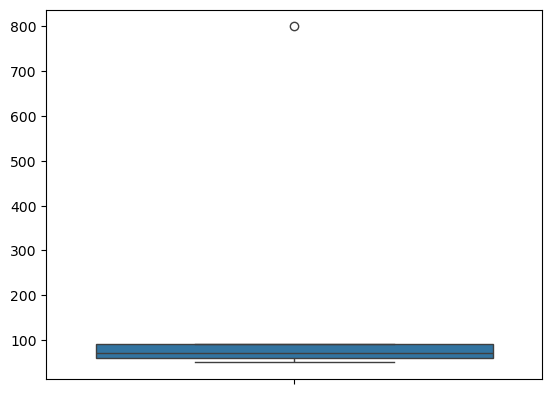

In [56]:
import seaborn as sns
sns.boxplot(data=d)

In [58]:
d = np.array([50,60,70,80,90])
mean = np.mean(d)
std_dev = np.std(d)
zscore = (d - mean)/std_dev
zscore

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

<Axes: >

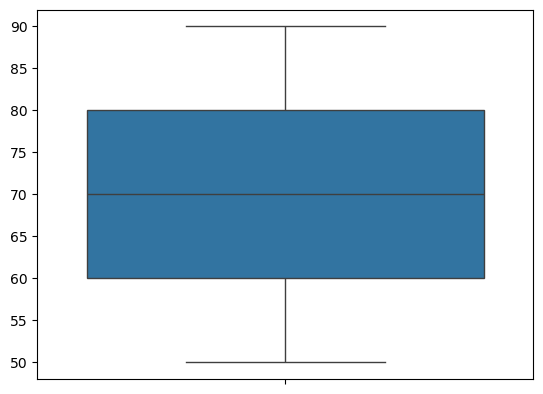

In [60]:
sns.boxplot(data=d)

In [ ]:
Regression
----------
 |->search the relationship among the variables

Y-axis    |
          |
          |---------
            x - axis - independent feature 
         x1 x2 x3 ...<== input(features)
y-axis - dependent feature

y=mx+c
  || |__________intercept
  ||___input
slope

In [62]:
from scipy import stats
x = [6,8,9,10,12,3,18,5,12,13,9,7,50]
y = [99,66,87,88,120,76,95,78,67,86,66,45,66]
len(x),len(y)

(13, 13)

In [64]:
print(stats.linregress)

<function linregress at 0x000001FC75B20860>


In [66]:
# file: ab.py
# ---------------
def fx(a):
    class box:
        def __init__(self,a):
            self.a=a
        def method1(self):
            return self.a+100
    obj = box(a)
    return obj

In [72]:
#import ab
#ab.fx(45)
myobj = fx(45)
myobj.method1()

145

In [74]:
stats.linregress(x,y)

LinregressResult(slope=-0.1543660448769938, intercept=81.84671532846716, rvalue=-0.09685165180525596, pvalue=0.752945258889857, stderr=0.47830166769150134, intercept_stderr=8.0975128198971)

In [76]:
# y = mx+c
slope,intercept,r,p,stderr = stats.linregress(x,y)

def fx(x):
    return slope * x + intercept 
    
model = []
for var in x:
    r=fx(var)
    model.append(r)

model

[80.92051905920519,
 80.6117869694512,
 80.45742092457421,
 80.30305487969721,
 79.99432278994323,
 81.38361719383617,
 79.06812652068126,
 81.07488510408218,
 79.99432278994323,
 79.83995674506623,
 80.45742092457421,
 80.7661530143282,
 74.12841308461746]

In [78]:
x

[6, 8, 9, 10, 12, 3, 18, 5, 12, 13, 9, 7, 50]

In [80]:
y

[99, 66, 87, 88, 120, 76, 95, 78, 67, 86, 66, 45, 66]

In [82]:
fx(55) # x - input

73.35658286023249

In [86]:
fx(15)

79.53122465531224

In [88]:
fx(60)

72.58475263584752

In [92]:
import matplotlib.pyplot as plt

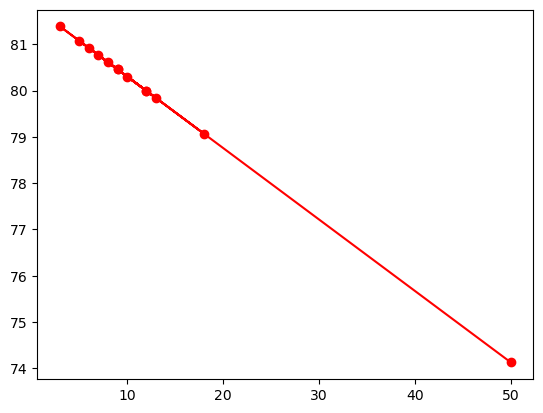

In [94]:
plt.plot(x,model,c='r',marker='o')

In [96]:
import seaborn as sn
sn.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


new_df = df.sample(n=50) # randomsample 
------
|->clean up ->model ->50data only 

In [102]:
iris_df = sn.load_dataset('iris')
iris = iris_df[['petal_length','petal_width']]

In [104]:
X = iris ['petal_length']
Y = iris ['petal_width']

In [106]:
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=24)

In [140]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(y_test).reshape(-1,1)

In [142]:
from sklearn.linear_model import LinearRegression
model_obj = LinearRegression()
model_obj.fit(x_train,y_train)
m = model_obj.intercept_
c = model_obj.coef_

In [146]:
y_pred_train = m * x_train + c
y_pre_train = model_obj.predict(x_train)

Text(0, 0.5, 'petal_width')

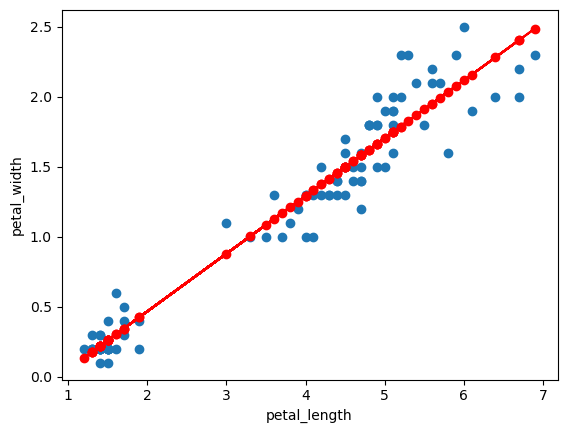

In [148]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pre_train,color='r',marker='o')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [150]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

-10.85071730094988

In [ ]:
# polynomial Regression
choose the degree of polynomial - Highest power of input (x)
  degree= 2 -> x2
fit the model
evaluate 
y=bo+b1x+b2xpower2....
non-linear relationship

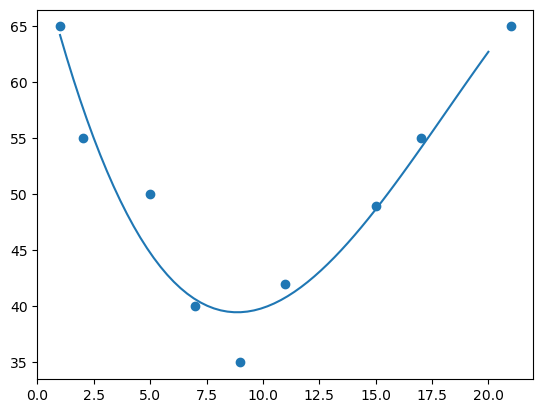

In [156]:
x = [1,2,5,7,9,11,15,17,21]
y = [65,55,50,40,35,42,49,55,65]

model = np.poly1d(np.polyfit(x,y,3)) # a3x3 + a2x2 + a1x1 + ao 
r = np.linspace(1,20,65)
plt.scatter(x,y)
plt.plot(r,model(r))

In [158]:
#help(np.polyfit)

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Get the data set - load the data
df_sal['Level'] and df_sal['Salary']
plt.xlabel('Level')
plt.ylabel('Salary')

split data into X , Y
X = 
Y = 

Train the model 
l = LinearRegression()
l.fit(X,Y)
p = PolynomialFeatures(degree=3)
x_poly = p.fit_transform(X)

predict result
y_pred_l =l.predict(X)
y_pred_poly = p.predit(x_poly)

Visaulize predictions

In [164]:
df_sal = pd.read_csv('Position_Salaries.csv')
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [166]:
df_sal.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


Text(0, 0.5, 'Salary')

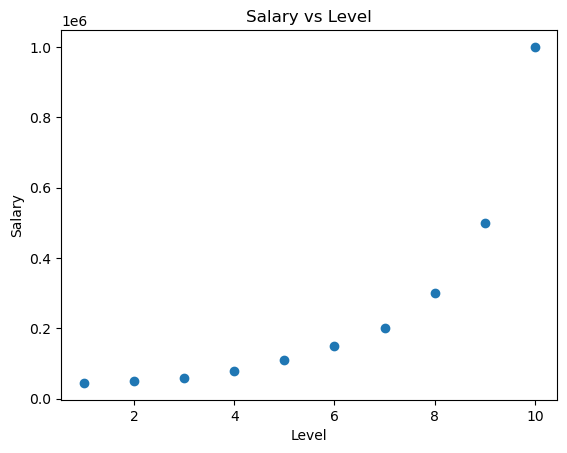

In [168]:
# Relationship between salary and level
plt.scatter(df_sal['Level'],df_sal['Salary'])
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')

In [178]:
# split data
X = df_sal.iloc[:,1:-1].values
Y = df_sal.iloc[:,-1].values

In [180]:
# LinearRegression
Lr = LinearRegression()
Lr.fit(X,Y)

LinearRegression()

In [192]:
# Polynomial Regression
pr = PolynomialFeatures(degree=4)
X_poly = pr.fit_transform(X)
Lr_2 = LinearRegression()
Lr_2.fit(X_poly,Y)

LinearRegression()

In [194]:
y_pred_lr = Lr.predict(X)  # linear regression
y_pre_poly = Lr_2.predict(X_poly) # polynomial regression

Text(0, 0.5, 'salary')

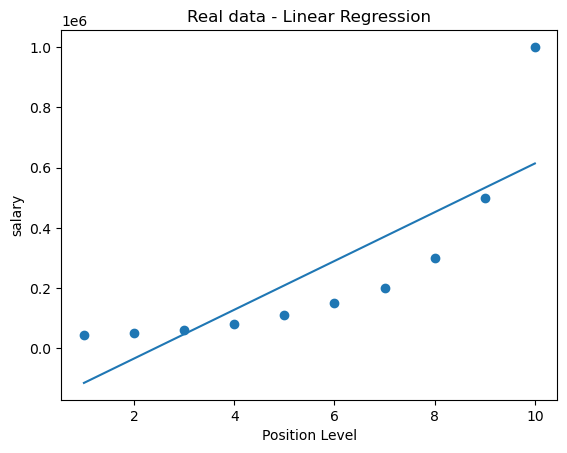

In [198]:
# prediction with linear regrssion
plt.scatter(X,Y)
plt.plot(X,Lr.predict(X))
plt.title('Real data - Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('salary')

Text(0, 0.5, 'salary')

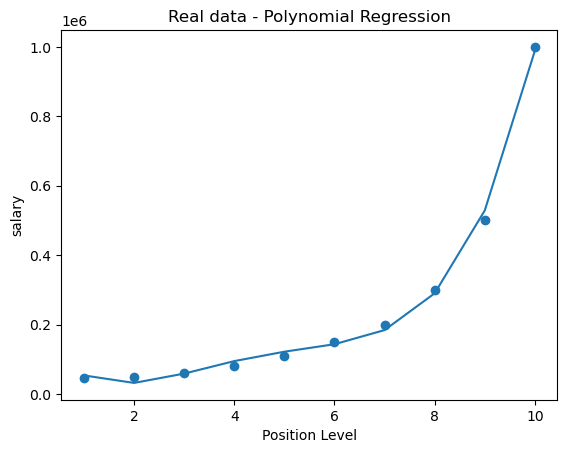

In [200]:
# prediction with polynomial regression
plt.scatter(X,Y)
plt.plot(X,Lr_2.predict(X_poly))
plt.title('Real data - Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('salary')

In [202]:
df_sal

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [208]:
# Test
Lr.predict([[7.5]])

array([411257.57575758])

In [212]:
Lr_2.predict(pr.fit_transform([[7.5]]))

array([225126.29297787])

In [ ]:
# Data Collection - networkx ->Graph() ->add_edges() ..
# feature engineerings
 - link prediction 
    |->common neighors => nx.common_neighbors(G,1,2)
    |->jaccard coefficient  => nx.jaccard_coefficient(G,1,2)
    |->adar index  ->nx.adar_..(G,1,2)

In [ ]:
jaccard coefficient - 
         |size of a intersection b|
J(a,b) = -----------------------
         |size a union b |


In [214]:
A={1,2,3,4}
B={3,4,5,6}
A.intersection(B)

{3, 4}

In [216]:
A.union(B)

{1, 2, 3, 4, 5, 6}

In [218]:
2/6

0.3333333333333333

In [ ]:
33 % similarity 
J(A,B) = 1
J(A,B) = 0 
# 33 %

In [220]:
import networkx as nx
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(2,3),(2,4),(3,4),(4,5)])

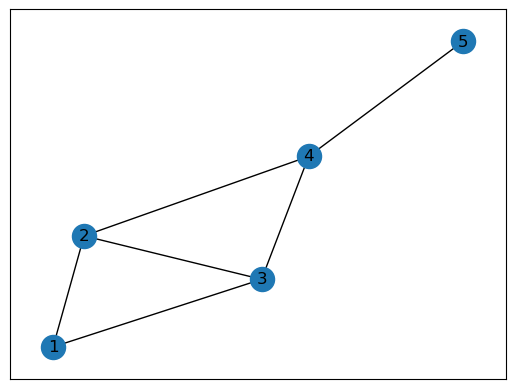

In [222]:
nx.draw_networkx(G)

In [224]:
# Calculate common neighbors
nx.common_neighbors(G,1,2)

<generator object common_neighbors.<locals>.<genexpr> at 0x000001FC050E5120>

In [226]:
list(nx.common_neighbors(G,1,2))

[3]

In [228]:
# Jaccard Coefficient 
nx.jaccard_coefficient(G,[(1,2),(1,3),(2,3)])

<generator object _apply_prediction.<locals>.<genexpr> at 0x000001FC0E471340>

In [230]:
jaccard = nx.jaccard_coefficient(G,[(1,2),(1,3),(2,3)])
for var in jaccard:
    print(var)

(1, 2, 0.25)
(1, 3, 0.25)
(2, 3, 0.5)


In [232]:
jaccard = nx.jaccard_coefficient(G,[(1,2),(1,3),(2,3)])
for n1,n2,p in jaccard:
    print(f'{n1} and {n2}:{p}')

1 and 2:0.25
1 and 3:0.25
2 and 3:0.5


In [ ]:
# Load the data
# Graph represent - Construct the graph 
# Feature engineering - jaccard coefficient
# data labels
# model training
# prediction
# ------------>deploy this model - social networks ; medical bilogical networks ...

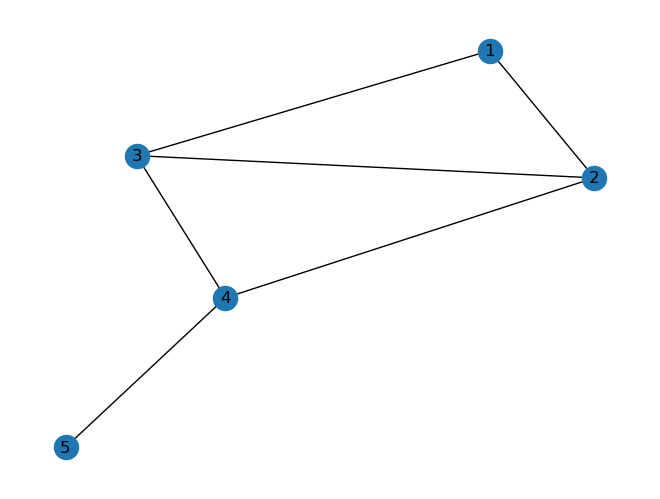

In [236]:
import networkx as nx
G = nx.Graph()
# load the data
G.add_edges_from([(1,2),(1,3),(2,3),(2,4),(3,4),(4,5)])
# display graph - construct the graph
nx.draw(G,with_labels=True)

In [238]:
# feature engineering - link prediction 
node_pairs = [(1,2),(1,3),(2,3),(2,4),(3,4),(4,5)]
features = list() # empty list

In [244]:
# jaccad_coeff 
for n1,n2 in node_pairs:
    count = len(list(nx.common_neighbors(G,n1,n2)))
    jaccard_coeff= next(nx.jaccard_coefficient(G,[(n1,n2)]))[2]
    features.append([count,jaccard_coeff])
    
print(features)

[[1, 0.25], [1, 0.25], [2, 0.5], [1, 0.2], [1, 0.2], [0, 0.0]]


In [248]:
# labels 
positive_samples = G.edges()

In [250]:
import random

In [256]:
# This is block style
all_nodes_pairs = list()
for i in G.nodes():
    for j in G.nodes():
        if( i != j):
            print(i,j)

1 2
1 3
1 4
1 5
2 1
2 3
2 4
2 5
3 1
3 2
3 4
3 5
4 1
4 2
4 3
4 5
5 1
5 2
5 3
5 4


In [258]:
# comprehension style
all_node_pairs = [(i,j) for i in G.nodes() for j in G.nodes() if i != j]

In [262]:
all_node_pairs

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4)]

In [264]:
G.has_edge(1,2)

True

In [266]:
G.has_edge(1,3)

True

In [268]:
G.has_edge(1,5)

False

In [270]:
negative_samples = [var for var in all_node_pairs if not G.has_edge(var[0],var[1])]
negative_samples

[(1, 4), (1, 5), (2, 5), (3, 5), (4, 1), (5, 1), (5, 2), (5, 3)]

In [272]:
G.has_edge(1,4)

False

In [276]:
negative_samples = random.sample(negative_samples,len(positive_samples))
labels = [1] * len(positive_samples) + [0] * len(negative_samples)

In [296]:
# combination of positive and negative
print(labels)
print(len(labels))

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
12


In [298]:
labels = [1,1,1,0,0,0]

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [300]:
try:
    X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,random_state=42)
except Exception as eobj:
    print(eobj)

In [302]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [304]:
y_pred = model.predict(X_test)

In [306]:
# evaluate model
accuracy_score(y_test,y_pred)

0.0

In [308]:
# prediction

new_pair = [(1,5)]
new_features = list()

for n1,n2 in new_pair:
    count = len(list(nx.common_neighbors(G,n1,n2)))
    jaccard_coeff= next(nx.jaccard_coefficient(G,[(n1,n2)]))[2]
    new_features.append([count,jaccard_coeff])
    
print(new_features)

[[0, 0.0]]


In [310]:
model.predict_proba(new_features)[0][1]

0.12561790875037276

In [ ]:
Node prediction
 node property <or> label

step 1: create a graph - random graph
step 2: assign random features to the nodes
step 3: assign random labels to the nodes ( 0 or 1)
step 4: extract the features X and Y - lables
step 5: split data into training and test
step 6: traing - randomforest 
step 7: predictions on the test set
step 8: evaluate the model

In [ ]:
 person enquire about course   Friend Uncle Brother Teacher1 Teacher2 ...
            ----------------->  CS    MECH   MECH    Civil    Physics  ....
                                     .....  ...... 

randomforest
 |->2 methods
1. Bagging - parallel
   - bootstrap sampling 
   - majority voting - final result

  o o o o o 
  o o o o o
[ o o o ]  [ o o o ] [ o o o ] <== bootstrapping
   |_________|___________|
             |
       Bagging 

2. boosting 
    - sequential 
    [o ->o ->o -o] ...

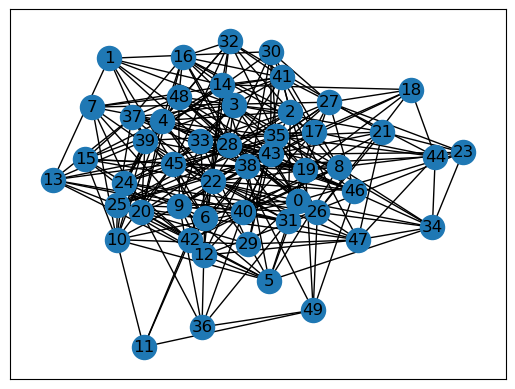

In [322]:
nx.draw_networkx(nx.erdos_renyi_graph(50,0.2))

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

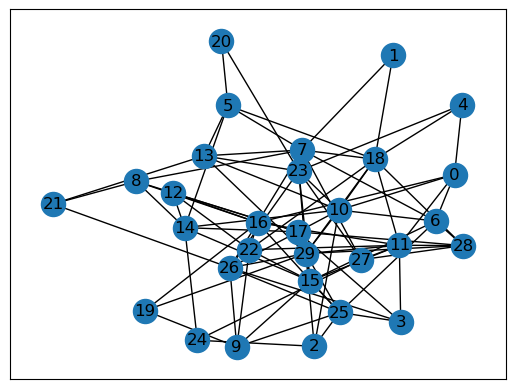

In [326]:
# step 1 create - er model graph - random
G = nx.erdos_renyi_graph(30,0.2) # 30 nodes ; prob of edge is 0.2
nx.draw_networkx(G)

In [328]:
# Assign random features to the nodes
node_features = np.random.rand(len(G.nodes),5) # 5 features per node

node_features

array([[0.0146303 , 0.5593482 , 0.25720235, 0.19575584, 0.50598181],
       [0.32667196, 0.07849913, 0.8728803 , 0.67000255, 0.72497219],
       [0.03080856, 0.26660053, 0.86673337, 0.23988949, 0.19075387],
       [0.30895805, 0.41012135, 0.30749497, 0.20117648, 0.37591091],
       [0.07802691, 0.56723347, 0.30916191, 0.15842926, 0.19264531],
       [0.10268162, 0.30325272, 0.16676592, 0.0591771 , 0.97918355],
       [0.83909069, 0.17533754, 0.61946371, 0.09386563, 0.38509766],
       [0.09627077, 0.80044433, 0.5308619 , 0.38245437, 0.49635184],
       [0.98717533, 0.92384179, 0.91724363, 0.65264778, 0.2380242 ],
       [0.37875317, 0.97431808, 0.8983424 , 0.04784643, 0.35999807],
       [0.14275242, 0.06296094, 0.12158026, 0.62434328, 0.18524202],
       [0.94909966, 0.88910463, 0.16739341, 0.45422322, 0.55752547],
       [0.8282585 , 0.07898292, 0.7150729 , 0.61795588, 0.59687546],
       [0.2619781 , 0.01503684, 0.88099512, 0.05100424, 0.68809394],
       [0.34167468, 0.7671366 , 0.

In [330]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [334]:
for i,node in enumerate(G.nodes):
    G.nodes[node]['features'] = node_features[i]

In [336]:
# assign random label
node_labels = np.random.randint(0,2,size=len(G.nodes))


In [338]:
for i,node in enumerate(G.nodes):
    G.nodes[node]['label'] = node_labels[i]

In [346]:
G.nodes[node]['features']
G.nodes[node]['label']

0

In [348]:
X = np.array([G.nodes[node]['features'] for node in G.nodes]) # node features
Y = np.array([G.nodes[node]['label'] for node in G.nodes]) # node labels 

In [350]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [352]:
classifier = RandomForestClassifier(n_estimators=100,random_state=42)
classifier.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [354]:
Y_pred = classifier.predict(X_test)

In [356]:
Y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0])

In [358]:
accuracy_score(Y_test,Y_pred)

0.3333333333333333

In [ ]:
NLP
----
Appln: - Google Translate
  Input: Hello good morning -> output: French ...
Text --> M/C - 1010
               -----//vector 

ML
--
Input: f1 f2 f3 ...fn <== independent 
Output: . . . . .  .. <== dependent features
model - number
Text -> vector (number) //NLP
1.corpus - paragraph 
2.documents - sentence 
3.vocabulary - unique words 

Tokenization 
My name is karthik, i am teaching NLP. Also i likes write code.// Corpus

D1 - My name is karthik, i am teaching NLP 
D2 - Also i likes write code

unique  words: My name is karthik , i am teaching NLP Also likes write code 
               |
              01010 000100 
like and likes
10101    101111
stemming - reducing root word 
history ->histori
lemma      ------
------
history ->history
eating ->eat

stopwords 
ngram
  [Good   morning how are you ] 
     |_______|
     |____________|
     |__________________|
     |_______________________|//n gram 
    word2vector //gensim lib

    D1 the food is good
    D2 the food is bad

     [the food  is  good  bad ] //unique words
     v=5
the 
    [ 1 0 0 0 0
      0 1 0 0 0
      0 0 1 0 0
      0 0 0 1 0
      0 0 0 0 1 ]

    Bag of word(BOG) - frequency 
    1 0 0 0 0  - 1

    food is good 

n=1  food is good 
      1    0  0
      0    1  0
      0    0  1
n=2  food is 
     --------
       1/0
n=3  food is good
     --------------
           1/0

n=N
TermFrequence - IDF
 IDF= logc No.of sentence / No.of sentence which contains the word

      S1  S2    S3
good  1/3  0/3  0/3
bad   0/3   0/3  1/3

    [InputLayer]  [Hidden] [outputlayer]
     1             0
     0             0      --->o/p
     1             0

In [ ]:
Deepwalk - random walk
|
node2vector

Spectral Methods

In [360]:
import ntlk

ModuleNotFoundError: No module named 'ntlk'

In [362]:
!pip install nltk

In [364]:
import nltk

In [366]:
corpus = '''Hello welcome,to NLP learning.
please do activity the entire course module! to ab'c defg'''

In [368]:
from nltk.tokenize import sent_tokenize
sent_tokenize(corpus)

['Hello welcome,to NLP learning.',
 'please do activity the entire course module!',
 "to ab'c defg"]

In [370]:
from nltk.tokenize import word_tokenize
word_tokenize(corpus)

['Hello',
 'welcome',
 ',',
 'to',
 'NLP',
 'learning',
 '.',
 'please',
 'do',
 'activity',
 'the',
 'entire',
 'course',
 'module',
 '!',
 'to',
 'ab',
 "'",
 'c',
 'defg']

In [372]:
from nltk.tokenize import wordpunct_tokenize
wordpunct_tokenize(corpus)

['Hello',
 'welcome',
 ',',
 'to',
 'NLP',
 'learning',
 '.',
 'please',
 'do',
 'activity',
 'the',
 'entire',
 'course',
 'module',
 '!',
 'to',
 'ab',
 "'",
 'c',
 'defg']

In [374]:
# porterStemmer
words = ["eating","eats","eaten","writing","writes","programming","programs","history","finally","finalized"]


In [376]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
stemming.stem("history")

'histori'

In [378]:
for var in words:
    print(var+"--------->"+stemming.stem(var))

eating--------->eat
eats--------->eat
eaten--------->eaten
writing--------->write
writes--------->write
programming--------->program
programs--------->program
history--------->histori
finally--------->final
finalized--------->final


In [380]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('history')

'history'

In [382]:
lemmatizer.lemmatize("going",pos='v')

'go'

In [384]:
for var in words:
    print(var+"--------->"+lemmatizer.lemmatize(var,pos='v'))

eating--------->eat
eats--------->eat
eaten--------->eat
writing--------->write
writes--------->write
programming--------->program
programs--------->program
history--------->history
finally--------->finally
finalized--------->finalize


In [388]:
from nltk.corpus import stopwords

In [390]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [392]:
stopwords.words('french')

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [398]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

voc = ['the','food','good','bad','ok']
label_obj = LabelEncoder()
label_encoded= label_obj.fit_transform(voc)

obj1 = OneHotEncoder(sparse_output=False)
label_encoded = label_encoded.reshape(len(label_encoded),1)
obj1.fit_transform(label_encoded)

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [400]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
s = "the food is good"
words = word_tokenize(s)
ngrams(words,1)

In [402]:
list(ngrams(words,1))

[('the',), ('food',), ('is',), ('good',)]

In [404]:
words = word_tokenize(s)
print(list(ngrams(words,1)))
print(list(ngrams(words,2)))
print(list(ngrams(words,3)))
print(list(ngrams(words,4)))
print(list(ngrams(words,5)))


[('the',), ('food',), ('is',), ('good',)]
[('the', 'food'), ('food', 'is'), ('is', 'good')]
[('the', 'food', 'is'), ('food', 'is', 'good')]
[('the', 'food', 'is', 'good')]
[]


In [408]:
# node centrality 
import networkx as nx
G = nx.erdos_renyi_graph(10,0.3)
degree_centrality={node: value for node, value in G.degree()}
degree_centrality

{0: 3, 1: 2, 2: 2, 3: 5, 4: 0, 5: 1, 6: 2, 7: 1, 8: 5, 9: 3}

In [412]:
!pip install node2vec

In [416]:
from node2vec import Node2Vec
node2vec = Node2Vec(G,dimension=64,walk_length=30,num_walk=200)
model = node2vec.fit()
model

ImportError: cannot import name 'triu' from 'scipy.linalg' (C:\Users\theeba\anaconda3\Lib\site-packages\scipy\linalg\__init__.py)

In [ ]:
vec(king)   [2.1,4.1,0.6]

vec(queen)  [-1.9,2.6,1.5]

vec(man)    [2.0,3.9,0.3]

vec(woman)  [-1.8,2.6,1.1]
# consine similarity

Input   project  output
[]       
[]      [sum] --->[wt]      
[]
[] 
################CBOW


Input    project   output
[]                   []
    --<-- [] --<--   []
                     []
########################## Skip-gram

( the )----(train)----(was)---(late)-
   (0)-----(1)------(2)-------(3)
# sentence - graph

In [ ]:
PyTorch
data ->tensors ->pretrained model ->fit the model ->evaluate ->deployment

In [420]:
import torch
arr = [[1,2],[3,4]]
torch.Tensor(arr)

tensor([[1., 2.],
        [3., 4.]])

In [422]:
torch.rand(3,3)

tensor([[0.8613, 0.9899, 0.1231],
        [0.2510, 0.6173, 0.9653],
        [0.2314, 0.5224, 0.6649]])

In [428]:
import torch
#import torchvision
import torch.nn as nn
#import torchvision.transforms as transforms

In [ ]:
#GPU 

In [430]:
torch.__version__

'2.5.1+cpu'

In [432]:
torch.arange(0,1,0.2)

tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000])

In [434]:
x = torch.arange(0,1,0.2)
y = 0.7 * x + 0.3
y

tensor([0.3000, 0.4400, 0.5800, 0.7200, 0.8600])

In [436]:
train_split = int(0.8 * len(x)) # 80% data for traiining ; 20% test
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(4, 4, 26, 1)

In [ ]:
import networkx as nx
import random
import numpy as np
from typing import List
from tqdm import tqdm
from gensim.models.word2vec import Word2Vec


class DeepWalk:
    def __init__(self, window_size: int, embedding_size: int, walk_length: int, walks_per_node: int):
        """
        :param window_size: window size for the Word2Vec model
        :param embedding_size: size of the final embedding
        :param walk_length: length of the walk
        :param walks_per_node: number of walks per node
        """
        self.window_size = window_size
        self.embedding_size = embedding_size
        self.walk_length = walk_length
        self.walk_per_node = walks_per_node

    def random_walk(self, g: nx.Graph, start: str, use_probabilities: bool = False) -> List[str]:
        """
        Generate a random walk starting on start
        :param g: Graph
        :param start: starting node for the random walk
        :param use_probabilities: if True take into account the weights assigned to each edge to select the next candidate
        :return:
        """
        walk = [start]
        for i in range(self.walk_length):
            neighbours = g.neighbors(walk[i])
            neighs = list(neighbours)
            if use_probabilities:
                probabilities = [g.get_edge_data(walk[i], neig)["weight"] for neig in neighs]
                sum_probabilities = sum(probabilities)
                probabilities = list(map(lambda t: t / sum_probabilities, probabilities))
                p = np.random.choice(neighs, p=probabilities)
            else:
                p = random.choice(neighs)
            walk.append(p)
        return walk

    def get_walks(self, g: nx.Graph, use_probabilities: bool = False) -> List[List[str]]:
        """
        Generate all the random walks
        :param g: Graph
        :param use_probabilities:
        :return:
        """
        random_walks = []
        for _ in range(self.walk_per_node):
            random_nodes = list(g.nodes)
            random.shuffle(random_nodes)
            for node in tqdm(random_nodes):
                random_walks.append(self.random_walk(g=g, start=node, use_probabilities=use_probabilities))
        return random_walks

    def compute_embeddings(self, walks: List[List[str]]):
        """
        Compute the node embeddings for the generated walks
        :param walks: List of walks
        :return:
        """
        model = Word2Vec(sentences=walks, window=self.window_size, vector_size=self.embedding_size)
        return model.wv

In [ ]:
from torch_geometric.nn import Node2Vec
import os.path as osp
import torch
from torch_geometric.datasets import Planetoid
from tqdm.notebook import tqdm

dataset = 'Cora'
path = osp.join('.', 'data', dataset)
dataset = Planetoid(path, dataset)  # dowload or load the Cora dataset
data = dataset[0]
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # check if cuda is available to send the model and tensors to the GPU
model = Node2Vec(data.edge_index, embedding_dim=128, walk_length=20,
                 context_size=10, walks_per_node=10,
                 num_negative_samples=1, p=1, q=1, sparse=True).to(device)

loader = model.loader(batch_size=128, shuffle=True, num_workers=4)  # data loader to speed the train 
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)  # initzialize the optimizer 


def train():
    model.train()  # put model in train model
    total_loss = 0
    for pos_rw, neg_rw in tqdm(loader):
        optimizer.zero_grad()  # set the gradients to 0
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))  # compute the loss for the batch
        loss.backward()
        optimizer.step()  # optimize the parameters
        total_loss += loss.item()
    return total_loss / len(loader)


for epoch in range(1, 100):
    loss = train()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}')

all_vectors = ""
for tensor in model(torch.arange(data.num_nodes, device=device)):
    s = "\t".join([str(value) for value in tensor.detach().cpu().numpy()])
    all_vectors += s + "\n"
# save the vectors
with open("vectors.txt", "w") as f:
    f.write(all_vectors)
# save the labels
with open("labels.txt", "w") as f:
    f.write("\n".join([str(label) for label in data.y.numpy()]))

In [ ]:
#####  End of the GML ###

In [ ]:
## Activity Answer- discussed usedcars.csv - dataset
##    

In [ ]:
load_data = pd.read_csv('used_cars_data.csv')
load_data.shape


In [ ]:
# Apply random sampling 

df = load_data.sample(n=35)
df.shape

In [ ]:
# Getinfo about sample data 
df.info()

In [ ]:
# to get list of columns
df.columns

In [ ]:
# see 1st 5lines/rows 
df.head()

In [ ]:
# drop unwanted columns
df.drop(columns=['S.No.','Seats','Owner_Type','Power'],inplace=True)

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
# check any duplicate items are exists
df.duplicated().isnull()

In [ ]:
df.duplicated().isnull().sum()

In [ ]:
# another way to check 
df.duplicated().any() # ->True - duplicate item is exists ; False - there is no duplicate item

In [ ]:
# check any empty values are exists
df.isnull().sum()

In [ ]:
df['New_Price']

In [ ]:
df['Price']

In [ ]:
# replace NaN value
df.fillna(value=df.isnull().sum()/len(df)*100,inplace=True)

In [ ]:
# check any empty values are exists
df.isnull().sum()

In [ ]:
# rename the column
df.rename(columns={'Kilometers_Driven':'km','Transmission':'trans'},inplace=True)

In [ ]:
df.columns

In [ ]:
plt.bar(df['Fuel_Type'],df['km'])

In [ ]:
plt.bar(df['Fuel_Type'],df['km'],width=0.2)

In [ ]:
mean=np.mean(df['km'])
std_dev = np.std(df['km'])
z_scores = (df['km'] - mean)/std_dev
#print(z_scores)
outliers = df['km'][np.abs(z_scores) > 61]
outliers

In [ ]:
sns.boxplot(data=df['km'])

In [ ]:
df.describe()

In [ ]:
d = np.random.normal(loc=50,scale=15,size=100)

In [ ]:
d.shape

In [ ]:
sns.boxplot(data=d)

In [ ]:
d = np.array([50,60,70,80,90])
mean = np.mean(d)
std_dev = np.std(d)
z_score = (d - mean) / std_dev
print(z_score)

In [ ]:
df['km'],df['Mileage']

In [ ]:
plt.plot(df['Mileage'],df['km'],marker='o')

In [ ]:
plt.scatter(df['Mileage'],df['km'])